# Implementing Logistic regression classifier via Gradient Descent

The code for Adaline learning algorithm is modified to implement logistic regression classifier, since the gradient descent update rule is the same, i.e. maximizing the log-likelihood is equal to minimizing the cost function J that we defined in adaline algorithm.

In [7]:
import numpy as np

class LogisticRegressionGD(object):
    """Logistic regression classifier via gradient descent.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        
        # first initialize weights
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        # iterately update weights
        for i in range(self.n_iter):
            # calculate net input z = wTx
            z = self.net_input(X)
            # calculate yhat/phi using activation function, which is a sigmoid function
            output = self.activation(X)
            # calculate errors
            errors = y - output
            # update weights
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # compute the logistic `cost` now instead of the sum of squared errors cost
            cost = - y.dot(np.log(output)) - (1-y).dot(np.log(1-output))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.activation(X) >= 0.5, 1, 0)
        
    def activation(self, X):
        z = self.net_input(X)
        return 1.0 / (1.0 + np.exp(-z))

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data[:100, [0, 2]], iris.target[:100]

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

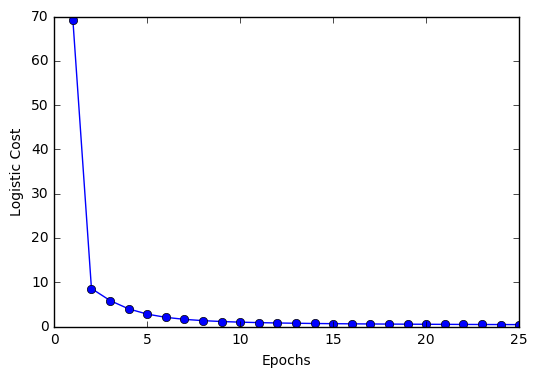

In [9]:
import matplotlib.pyplot as plt

lr = LogisticRegressionGD(n_iter=25, eta=0.15)
lr.fit(X_std, y)

plt.plot(range(1, len(lr.cost_) + 1), lr.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Logistic Cost')
plt.show()